<a href="https://colab.research.google.com/github/MichaelAnth/ML-for-Digital-Advertising-Applications/blob/master/Python_Exercise_3_LASSO_fat_data_Michael.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digital Advertising Python Exercise 3
### **Author:** Michael Anthony
### **Date:** November 2019
### **Objective:** Use Lasso regression to select the most significant predictors for purchases of bobo-bars from census variables.  

# Document Setup and Loading Libraries

In [0]:
import pandas as pd
import pandas
# sklearn.cross_validation was not importing train_test_split so the model
# selection module is used instead
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoLarsCV
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df=pd.read_csv('drive/My Drive/Colab Notebooks/finalmaster-ratios.csv')
df.head()

,# Purchases,B01001001,B01001002,B01001003,B01001004,B01001005,B01001006,B01001007,B01001008,B01001009,B01001010,B01001011,B01001012,B01001013,B01001014,B01001015,B01001016,B01001017,B01001018,B01001019,B01001020,B01001021,B01001022,B01001023,B01001024,B01001025,B01001026,B01001027,B01001028,B01001029,B01001030,B01001031,B01001032,B01001033,B01001034,B01001035,B01001036,B01001037,B01001038,B01001039,...,B15002013,B15002014,B15002015,B15002016,B15002017,B15002018,B15002019,B15002020,B15002021,B15002022,B15002023,B15002024,B15002025,B15002026,B15002027,B15002028,B15002029,B15002030,B15002031,B15002032,B15002033,B15002034,B15002035,B19001001,B19001002,B19001003,B19001004,B19001005,B19001006,B19001007,B19001008,B19001009,B19001010,B19001011,B19001012,B19001013,B19001014,B19001015,B19001016,B19001017
0,22,206252,469.226965,31.432422,35.219052,33.628765,20.121017,12.610787,6.734480,6.225394,19.432539,28.101546,28.421543,26.390047,31.989993,31.359696,32.116052,32.213021,12.184124,18.361034,9.454454,15.175610,16.281054,11.025348,6.230243,4.518744,530.773035,31.999690,34.322091,32.649380,20.101623,12.513818,8.072649,6.021760,22.923414,31.335454,31.558482,31.063941,36.082074,34.845723,...,64.610300,31.449746,58.735313,20.071053,6.726751,5.882267,543.803963,6.974272,2.504332,5.904107,11.917415,10.767170,18.141844,19.779852,10.956451,181.418442,26.717724,85.271036,54.243532,72.647457,30.816383,2.831933,2.912014,1000,105.667996,82.298375,68.141163,67.336195,63.566902,59.439845,49.409690,53.306757,42.318307,83.167229,89.249208,102.141470,52.872330,36.440765,23.446284,21.197485
1,7,61399,486.538869,22.899396,21.531295,27.036271,16.808091,28.355511,18.192479,13.534422,21.466148,24.886399,23.534585,21.319565,27.101419,30.961416,37.117868,36.466392,12.557208,20.554081,12.182609,15.651721,20.668089,15.961172,10.423623,7.329110,513.461131,18.974250,23.404290,23.892897,17.036108,35.310021,18.534504,17.101256,22.785387,22.150198,22.622518,21.303279,26.971123,32.329517,...,56.929829,46.381727,65.707446,35.509451,16.782205,9.201536,515.086529,3.017306,1.047329,1.371503,6.358785,4.937410,8.303825,9.700264,7.555733,174.155902,25.834123,60.146626,62.440776,76.604658,55.383771,8.977108,9.251409,1000,71.289558,59.062447,54.704688,60.966323,53.012354,60.881706,59.231680,50.093078,40.700626,92.612963,117.363344,113.344051,75.774243,33.000508,33.169741,24.792689
2,3,73170,489.859232,28.905289,36.271696,28.235616,21.566216,12.218122,7.243406,7.380074,16.933169,24.914582,26.896269,31.802651,30.531639,36.258029,35.998360,33.429001,13.625803,19.406861,12.245456,14.664480,21.169878,15.293153,8.610086,6.259396,510.140768,26.171928,30.681973,31.925653,19.789531,10.072434,5.056717,6.218396,15.757824,24.449911,26.595599,27.210605,37.556376,37.050704,...,54.602613,40.613027,43.363788,12.280185,5.796247,3.438452,523.980745,5.422930,4.224384,11.828274,18.331860,15.089891,21.731015,18.685529,7.014441,155.241183,45.466156,71.185775,65.802142,56.272718,24.580018,1.689753,1.414677,1000,102.538696,82.960331,74.828305,79.133495,66.081252,78.245122,63.996993,47.322923,42.505211,70.420610,90.033143,98.677692,54.703249,20.125056,11.890525,16.537397
3,94,251724,505.585483,32.054949,31.757004,28.102207,18.651380,12.080692,7.035483,7.686991,25.790151,42.129475,35.824951,32.058922,27.677138,33.842621,38.176733,32.722347,12.493842,16.394940,11.504664,15.914255,16.394940,13.196994,8.648361,5.446441,494.414517,33.123580,28.082344,30.171934,16.863708,9.280005,5.390825,5.609318,19.453846,35.614403,32.082757,28.809331,27.911522,32.690566,...,88.227492,44.076261,87.939148,44.404973,9.671057,7.283569,502.912274,4.509700,0.980370,3.552398,5.986021,7.398907,9.740260,10.605292,7.485410,141.242417,43.078591,84.479020,52.069156,89.836451,33.932320,4.129086,3.886877,1000,61.632139,46.526521,48.437595,54.221644,51.680322,60.066684,54.790900,48.681562,43.873381,84.717507,112.204444,127.137252,83.019904,43.731067,38.851729,40.427349
4,0,37382,495.586111,25.413301,29.318924,26.162324,19.260607,12.893

# Interogating the Dependent Variable - Purchases
We look at the dependant variable "# Purchases" to identify early challenges in predicting this variable.

In [0]:
df['# Purchases'].describe()

count     732.000000
mean       45.493169
std       188.405328
min         0.000000
25%         1.000000
50%         4.000000
75%        15.000000
max      2861.000000
Name: # Purchases, dtype: float64

(array([656.,  38.,   7.,   6.,   3.,   1.,   0.,   4.,   1.,   4.,   3.,
          1.,   2.,   0.,   0.,   1.,   2.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([   0.   ,   71.525,  143.05 ,  214.575,  286.1  ,  357.625,
         429.15 ,  500.675,  572.2  ,  643.725,  715.25 ,  786.775,
         858.3  ,  929.825, 1001.35 , 1072.875, 1144.4  , 1215.925,
        1287.45 , 1358.975, 1430.5  , 1502.025, 1573.55 , 1645.075,
        1716.6  , 1788.125, 1859.65 , 1931.175, 2002.7  , 2074.225,
        2145.75 , 2217.275, 2288.8  , 2360.325, 2431.85 , 2503.375,
        2574.9  , 2646.425, 2717.95 , 2789.475, 2861.   ]),
 <a list of 40 Patch objects>)

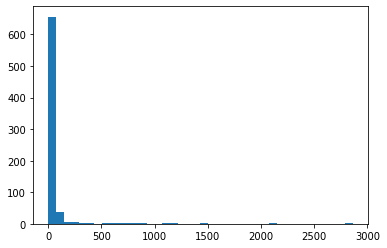

In [0]:
plt.hist(df['# Purchases'],bins=40)

We notice from the description and histogram that this variable is extremly right skewed. Best practice would be to analyze the distribution of the predictors we plan to use and to normalize the skewed variables.

# Creating a List of Variables and Separating Target and Predictors

In [0]:
allvariablenames = list(df.columns.values)
allvariablenames[0:10]

['# Purchases',
 'B01001001',
 'B01001002',
 'B01001003',
 'B01001004',
 'B01001005',
 'B01001006',
 'B01001007',
 'B01001008',
 'B01001009']

In [0]:
#build a list of the predictors, #
listofallpredictors=allvariablenames[8:]

#load predictors into dataframe
predictors = df[listofallpredictors]  

#load target into dataframe
target = df['# Purchases']  

# Split the data into training and testing sets

In [0]:
# use sample code to split data for training and testing
# split data into train and test sets, with 30% retained for test
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, target, test_size=.3, random_state=123) 

#Fitting the Lasso Model

In [0]:
model=LassoLarsCV(precompute=False,cv=10)
model.fit(pred_train,tar_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.496e+00, with an active set of 5 regressors, and the smallest cholesky pivot element being 6.322e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 8 iterations, i.e. alpha=1.098e+00, with an active set of 8 regressors, and the smallest cholesky pivot element being 6.322e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 10 iterations, i.e. alpha=7.329e-01, with an active set of 10 regressors, and the smallest cholesky pivot element b

LassoLarsCV(copy_X=True, cv=10, eps=2.220446049250313e-16, fit_intercept=True,
            max_iter=500, max_n_alphas=1000, n_jobs=None, normalize=True,
            positive=False, precompute=False, verbose=False)

# Question 1
Explain each line of Code

In [0]:
#build coefficent chart
#### QUESTION 1: Explain each line of Code ####

# In the next line, we build a data frame containing all of the predictor names. 
predictors_model=pd.DataFrame(listofallpredictors)

# Here, we change the name of the column in our new data frame to label.
predictors_model.columns = ['label']

# We create a second coulmn on the data frame called coefficient, we will now 
# have a place to store a label and a coefficeient for each predictor. 
predictors_model['coeff'] = model.coef_

# iterate through the predictor model table and print the rows where the 
# coefficient is greater  than zero (It would be best to print out the rows where
# the absolute value of the coeff value is greater than zero so we could capture 
# predictors with an inverse relationship to purchases as well..)
for index, row in predictors_model.iterrows():
     if row['coeff'] > 0:
         print(row.values)
mask=predictors_model['coeff']>0
signif_predictors=predictors_model[mask]
signif_predictors

['B01001014' 0.8558761066941788]
['B01001036' 2.5053482381631653]
['B01001037' 0.8892493223320962]
['B01001038' 1.5316387928880384]
['B02001005' 0.41252295298457853]
['B13014026' 0.48004105312075906]
['B13014027' 0.6978957445987839]
['B13016001' 875149895.329212]
['B19001017' 1.4834348068681533]


,label,coeff
6,B01001014,8.558761e-01
28,B01001036,2.505348e+00
29,B01001037,8.892493e-01
30,B01001038,1.531639e+00
46,B02001005,4.125230e-01
96,B13014026,4.800411e-01
97,B13014027,6.978957e-01
113,B13016001,8.751499e+08
181,B19001017,1.483435e+00


# Find websites that explain each census variable and append these websites to the explanitory variable table

In [0]:
# load packages to perform google search
!pip install beautifulsoup4
!pip install google
from googlesearch import search 

In [0]:
#we now write a code to search for "census " followed by the census variable name for each of the variables we found to be significant
census_variable_websites=[]
for i in  range(len(signif_predictors.label)):  
    query = 'census %s' %signif_predictors.label[i:i+1].to_string(index=False)
    for j in search(query, tld="co.in", num=10, stop=1, pause=.2):
        print(j) 
        census_variable_websites.append(j)
# next we append these reference sites to our significant predictors table so we keep them connected to their respective variable
signif_predictors['census_variable_website_reference']=census_variable_websites
signif_predictors

https://www.socialexplorer.com/data/ACS2015_5yr/metadata/?ds=ACS15_5yr&var=B01001014
https://www.socialexplorer.com/data/ACS2010/metadata/?ds=ACS10&var=B01001036
https://www.socialexplorer.com/data/ACS2014/metadata/?ds=ACS14&var=B01001037
https://www.socialexplorer.com/data/ACS2010/metadata/?ds=ACS10&var=B01001038
https://www.socialexplorer.com/data/ACS2012_5yr/metadata/?ds=ACS12_5yr&var=B02001005
https://www2.census.gov/programs-surveys/acs/summary_file/2009/documentation/3_year/user_tools/ACS2009_3-Year_TableShells.xls?
https://www2.census.gov/programs-surveys/acs/summary_file/2009/documentation/3_year/user_tools/ACS2009_3-Year_TableShells.xls?
https://www2.census.gov/acs2010_1yr/summaryfile/ACS2010_1-Year_TableShells.xls
https://www.socialexplorer.com/data/ACS2009_5yr/metadata/?ds=ACS09_5yr&var=B19001017


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,label,coeff,census_variable_website_reference
6,B01001014,8.558761e-01,https://www.socialexplorer.com/data/ACS2015_5y...
28,B01001036,2.505348e+00,https://www.socialexplorer.com/data/ACS2010/me...
29,B01001037,8.892493e-01,https://www.socialexplorer.com/data/ACS2014/me...
30,B01001038,1.531639e+00,https://www.socialexplorer.com/data/ACS2010/me...
46,B02001005,4.125230e-01,https://www.socialexplorer.com/data/ACS2012_5y...
96,B13014026,4.800411e-01,https://www2.census.gov/programs-surveys/acs/s...
97,B13014027,6.978957e-01,https://www2.census.gov/programs-surveys/acs/s...
113,B13016001,8.751499e+08,https://www2.census.gov/acs2010_1yr/summaryfil...
181,B19001017,1.483435e+00,https://www.socialexplorer.com/data/ACS2009_5y...


# Question 2
## *Explain what each variable means in terms of the census variable and the coefficients impact on profit.*


##['B01001014' 0.8558761066941788]
The first label corresponds to the percent of the population that is male and age 40 and 44. This model predicts a 0.86 unit increase in the number of purchases in an area for each percentage point increase in this demographic.
##['B01001036' 2.5053482381631653]
The next variable corresponds to the percent of the population that is female and between 30 and 36 years old - for a percentage point increase in this demographic variable the model predicts a 2.5 unit increase in purchases in that area.
##['B01001037' 0.8892493223320962]
This variable corresponds to the percent of the population that is female and between 35 and 39 years old - for a percentage point increase in this demographic variable the model predicts a 0.88 unit increase in purchases in that area.
##['B01001038' 1.5316387928880384]
This label corresponds to the percent of the population that is female and age 40 and 44. This model predicts a 1.53 unit increase in the number of purchases in an area for each percentage point increase in this demographic. This is higher than the 0.86 coefficient for our male 40 to 44 variable, indicating that a higher proportion of middle-aged females is likely to drive purchases more substantially than middle-aged males.
##['B02001005' 0.41252295298457853]
This variable corresponds to the percentage of the population that is Asian; for each percent increase in the proportion of the population that is Asian, the model predicts a 0.4 unit increase in purchases.
##['B13014026' 0.48004105312075906]
This variable corresponds to the proportion of the population composed of unmarried women who did not have a child in the last year and have a bachelors degree. For each percent increase in this variable the model predicts a 0.48 unit increase in sales.
##['B13014027' 0.6978957445987839]
This variable corresponds to the proportion of the population composed of unmarried women who did not have a child in the last year and have a graduate or professional degree. For each percent increase in this variable the model predicts a 0.7 unit increase in sales. By looking at this and the previous variable, we see that educated women are a likely purchasing base of this product - bobo bars.
##['B13016001' 875149895.329212]
This variable corresponds to the percent of the population that is female and 15 to 50 who had a baby in the last 12 months. For each percent increase in this variable the model predicts a 875,149,895 unit increase in sales. This coefficient is extremely high; this indicates that new mothers are strong purchasers of bobobars, and that the overall proportion of the population in this group is very small and hence a full percentage point increase in this variable is highly unlikely.
##['B19001017' 1.4834348068681533]
This variable corresponds to the percent of households where the household income exceeds $200,000 per year - for a percentage point increase in this demographic variable the model predicts a 1.5 unit increase in purchases in that area.


# Question 3
*If I had to report only two census variables to my boss that most steeply predicted sales, what would those be?*

If I could only report two predictor variables I would report the census variable 'B13016001' and 'B01001036' which have the two largest coefficients. These two variables correspond to the proportion of the population that is female and had a baby within the last year and is between 15 and 50, and the proportion of the population that is female and 30 to 36. The percentage of the population made up of new moms is the predictor with the highest coefficient in this Lasso Regression meaning that a percentage point increase in this population is likely to drive purchases of bobobars more substantially than an increase of 1 percent in any other demographic.


#  Question 4 - Mean Squared Error
Here, the test data has a Mean Squared Error (MSE) nearly twice that of the training data (approximately 42,000 vs 22,000 respectively). Mean Squared Error is the average difference between the predicted and actual value. Effectively, this value helps us determine how far off we can expect our predictions to be from reality. By observing that the MSE of the training set is half that of the test set we conclude that the model predicts values closer to the actual value for the training set than for the test set - this is logical as the regression was created from the training data. by taking the square root of the MSE we can estimate the average number of units off from the actual value our prediction will be. sqrt(41550) is 203; hence, we can assume that our prediction for the number of purchases will diverge from the actual number of purchases by 203 units. Here, we are regressing on an un-normalized right-skewed variable and hence, this MSE value may be indicating the average magnitude by which we systematically overestimate purchases using this linear model. 

In [0]:
# mean squared error 
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(tar_train, model.predict(pred_train))
print ('training data MSE')
print(train_error)

test_error = mean_squared_error(tar_test, model.predict(pred_test))
print ('test data MSE')
print(test_error)
print(math.sqrt(41549.54803776253))

training data MSE
22025.491066757
test data MSE
41549.54803776253
203.83706247334544


# R-Squared Comparison
The r squared value for the training data is .24 and .18 for the test data. This means that in the case of the training data, our multiple regression model explains 24% of the variance present. In the case of the test data, our model only explains 18% of the variance.

In [0]:
#r squared
rsquared_train=model.score(pred_train,tar_train)
print ('training data R-square')
print(rsquared_train)
rsquared_test=model.score(pred_test,tar_test)
print ('test data R-square')
print(rsquared_test)

training data R-square
0.2400221219784492
test data R-square
0.1758628512005107


# Question 5 - Census data as a predictor
In the analysis of the r-squared values, we see that this multiple regression model only explains a small portion of the overall variance in the test data (18%). This implies that there are omitted variables that could not be captured in this study that determine the purchases by location. This could be things like promotions, the number of stores offering the product in an area or other factors. Demographic variables help us explain some of the trends in bobo-bar purchases, and hence could help guide managerial decision making such as marketing or ad spend. However, demographic variables do not capture a substantial enough portion of the variation in purchases to proceed with decision making without further study.

# Question 6 - Baseline Sales
With a y-intercept of 22, this model predicts a baseline sale of 22 bars per location. This means that upon entering a new location we could predict a sale of 22 bars. This number is then increased proportionally based on the demographic factors outlined in the multiple regression model and their corresponding coefficients. This number is a baseline and only increases based on demographic variables as we only retained predictors with positive coefficients.


In [0]:
print("y interecept:")
print(model.intercept_)

y interecept:
22.19738813257551
